### MARMAR Output Similarity Analysis

This script evaluates the consistency of the fields generated by the MARMAR system using 
ClinicalBERT embeddings and pairwise cosine similarity. It calculates the mean similarity and similarity variance for each specified field to provide insights into the variability of outputs.


#### Workflow:

1. Load outputs from a CSV file.
2. Extract specified text fields to evaluate.
3. Encode the text fields using ClinicalBERT to generate embeddings.
4. Compute pairwise cosine similarity scores to assess consistency.
5. Save the calculated mean similarity and variance for each field to a new CSV file.

This analysis helps validate the reliability and consistency of MARMAR's responses across multiple iterations.

In [1]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load ClinicalBERT
model_name = "medicalai/ClinicalBERT"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

def encode_with_clinicalbert(texts):
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt", max_length=256)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :]

# Load all outputs
outputs_df = pd.read_csv("all_outputs_test_case_1.csv")

# Fields to evaluate
fields_to_check = ['generalExplanation', 'detailedExplanation', 'generalAdvice', 'tailoredAdvice', 'pharmacologicalExplanation']

results = {}

for field in fields_to_check:
    texts = outputs_df[field].dropna().tolist()
    
    # Generate ClinicalBERT embeddings
    embeddings = encode_with_clinicalbert(texts).numpy()
    
    # Calculate pairwise cosine similarities
    cosine_sim_matrix = cosine_similarity(embeddings)
    n = len(texts)
    
    # Calculate mean similarity
    total_sim = sum(cosine_sim_matrix[i, j] for i in range(n) for j in range(i + 1, n))
    mean_similarity = total_sim / (n * (n - 1) / 2)
    
    # Calculate similarity variance
    similarity_scores = [cosine_sim_matrix[i, j] for i in range(n) for j in range(i + 1, n)]
    similarity_variance = np.var(similarity_scores)
    
    # Store results
    results[field] = {
        "Mean Similarity": mean_similarity,
        "Similarity Variance": similarity_variance
    }

# Convert results to DataFrame and save
results_df = pd.DataFrame(results).T
results_df.to_csv("similarity_analysis_test_case_1.csv")
print("Mean BERT Similarity and Similarity Variance saved to 'similarity_analysis_test_case_1.csv'.")


Mean BERT Similarity and Similarity Variance saved to 'similarity_analysis_test_case_1.csv'.


### Visualizing the results


/var/folders/fq/swx5cccx46l8c3yntkbs6pr80000gn/T/ipykernel_97576/926386394.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_variance_df, x='Field', y='Mean Similarity', palette="Blues_d")


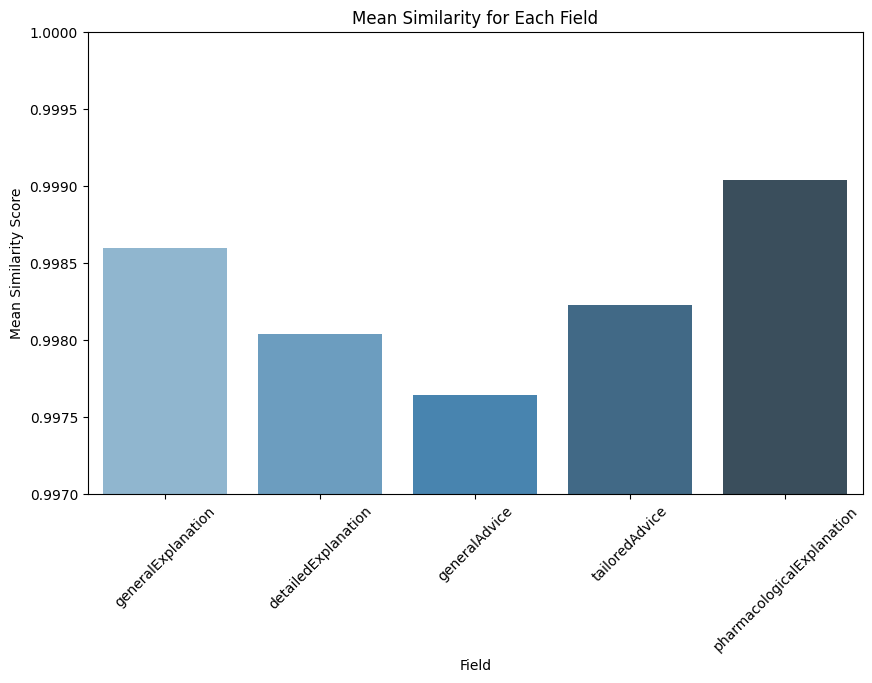

/var/folders/fq/swx5cccx46l8c3yntkbs6pr80000gn/T/ipykernel_97576/926386394.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_variance_df, x='Field', y='Similarity Variance', palette="Reds_d")


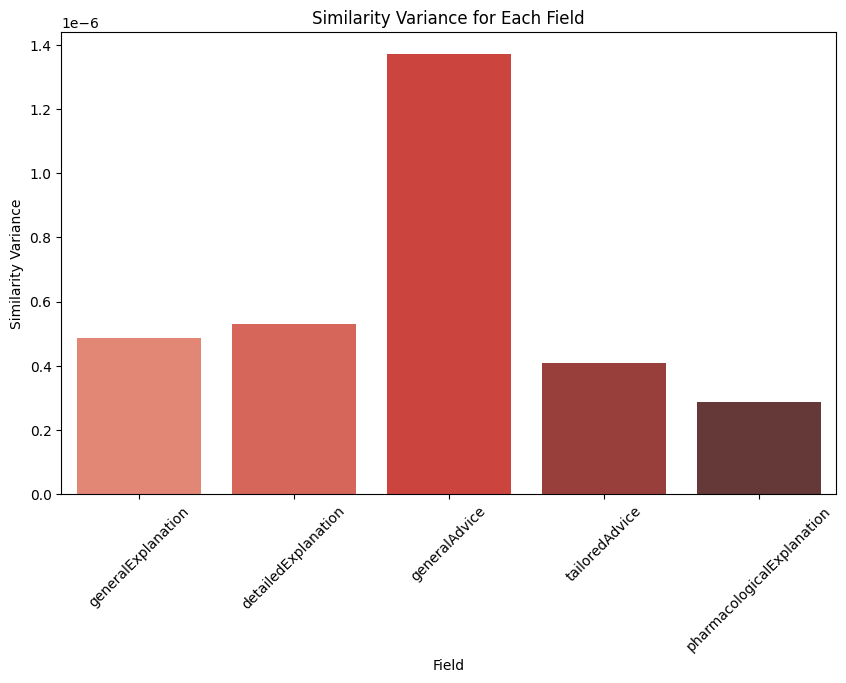

/var/folders/fq/swx5cccx46l8c3yntkbs6pr80000gn/T/ipykernel_97576/926386394.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_variance_df, x='Field', y='Mean Similarity', palette="Blues", alpha=0.6, ax=ax1)
/var/folders/fq/swx5cccx46l8c3yntkbs6pr80000gn/T/ipykernel_97576/926386394.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_variance_df, x='Field', y='Similarity Variance', palette="Reds", alpha=0.6, ax=ax2)


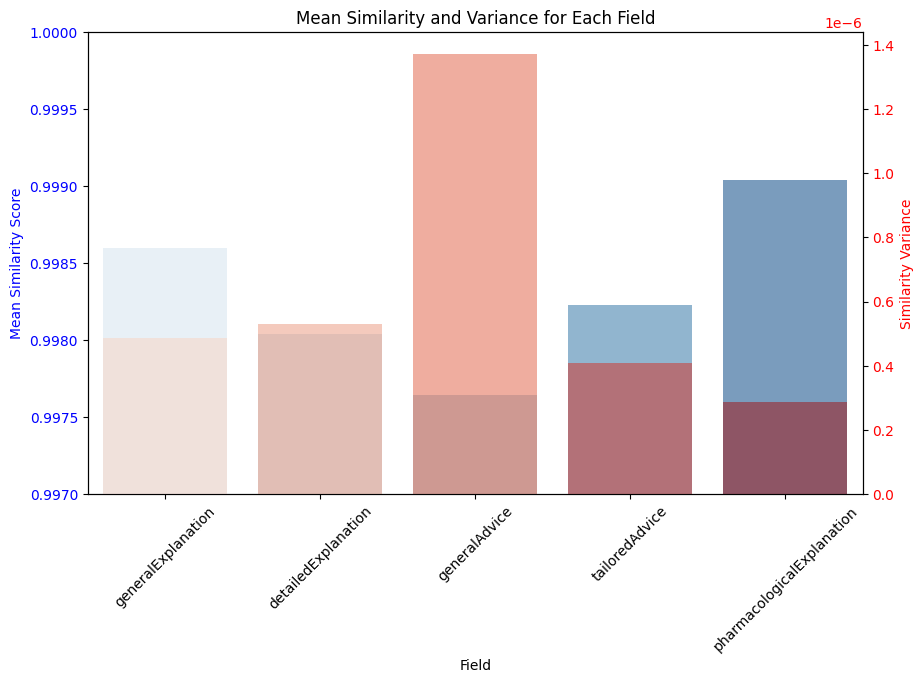

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV files
outputs_df = pd.read_csv("all_outputs_test_case_1.csv")
consistency_df = pd.read_csv("consistency_results_test_case_1.csv")

# Extract Mean Similarity and Variance from the consistency results
mean_variance_df = pd.DataFrame({
    'Field': ['generalExplanation', 'detailedExplanation', 'generalAdvice', 'tailoredAdvice', 'pharmacologicalExplanation'],
    'Mean Similarity': [0.99859476, 0.99804056, 0.99764335, 0.9982259, 0.999039],
    'Similarity Variance': [4.8531905e-07, 5.2880733e-07, 1.3714415e-06, 4.0907597e-07, 2.858252e-07]
})

# Plot 1: Mean Similarity for each field
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_variance_df, x='Field', y='Mean Similarity', palette="Blues_d")
plt.title("Mean Similarity for Each Field")
plt.xticks(rotation=45)
plt.ylim(0.997, 1)
plt.ylabel("Mean Similarity Score")
plt.show()

# Plot 2: Similarity Variance for each field
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_variance_df, x='Field', y='Similarity Variance', palette="Reds_d")
plt.title("Similarity Variance for Each Field")
plt.xticks(rotation=45)
plt.ylabel("Similarity Variance")
plt.show()

# Plot 3: Combined Mean Similarity and Variance
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Mean Similarity
sns.barplot(data=mean_variance_df, x='Field', y='Mean Similarity', palette="Blues", alpha=0.6, ax=ax1)
ax1.set_ylabel("Mean Similarity Score", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
plt.xticks(rotation=45)
plt.ylim(0.997, 1)

# Twin axis for Variance
ax2 = ax1.twinx()
sns.barplot(data=mean_variance_df, x='Field', y='Similarity Variance', palette="Reds", alpha=0.6, ax=ax2)
ax2.set_ylabel("Similarity Variance", color="red")
ax2.tick_params(axis='y', labelcolor="red")

# Titles and Labels
plt.title("Mean Similarity and Variance for Each Field")
plt.show()
